# 1. DEFINING THE QUESTION

### a) Specifying the Question

This project will entail three parts. In the first part,  we will analyze how the messages from presidential candidates affect their image and eventually their voter popularity. We seek to analyze the different phrases used by the presidential aspirants affect the common mwananchi in a positive and negative way. This analysis can give a list of phrases that should be avoided and those that can be used to boost one’s popularity.

The second aspect of this project is to analyze the qualities that can be associated with a good leader. We are going to analyze, through people’s sentiments, what are the most popular qualities that the public would wish to see in their leaders and what they want most from them. Is it good roads, reduction of commodities, more schools to be built, among others.

The last and most sensitive part is to analyze which presidential candidate will win and by what margin. This part will not be for public consumption. We intend to hand this part of the project to a company such as Ipsos so that they can integrate it in their analysis. Access to this information will be restricted to a few people.



### b) Defining the Metric for Success

Sucessfully determine the trending topics, most popular political coalitions and presidential aspirants, establish which candidate is leading at the moment using obtained sentiments, and prediction of the most likely winners of the August 9th, 2022 Kenyan presidential election

### c) Understanding the context

The dataset used has six attributes
0   Unnamed: 0 - Irrelevant data        
 1   Unnamed: 0.1 - Irrelevant        
 2   tweet_id - Unique identifier of tweet        
 3   time- Time tweet was scraped
 4   tweet - The scraped tweet       
 5   retweet_count - the number of retweets a tweet obtained

### d). Recording the Experimental Design

- Defning the questions
- Data Loading 
- Previewing the dat
- Data pre-processing
- Feature engineering
- EDA
- Election Prediction
- Results
- Conclusion
- Further questions

### e) Data Relevance

The dataset to use for this project can be found by following this link:
 LINK TO BE PROVIDED


Assumptions

We shall assume the data is accurate



# Analysis

## Importing libraries

In [1]:
# importing the libraries that we will nned
import gensim
from nltk.stem import WordNetLemmatizer
import nltk
import seaborn as sns
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Loading dataset

In [3]:
# Load dataframe
def load_csv(filepath):
    df = pd.read_csv(filepath)
    return df

In [4]:
# loading dataframe
filepath = "/content/cleaned_df_amos.csv"

df = load_csv(filepath)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  after removing the cwd from sys.path.


## Previewing dataset

In [5]:
# function to preview the dataframe preview dataframe
def preview_df(df):
    head = df.head()
    tail = df.tail()
    random_sample = df.sample(30)
    rows, columns = df.shape

    return head, tail, random_sample, print(f"THe dataframe has {rows} rows and {columns} columns")


In [6]:
# preview shape of datframe
rows, columns = df.shape

# print
print(f"THe dataframe has {rows} rows and {columns} columns")

THe dataframe has 405650 rows and 6 columns


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353439 entries, 0 to 405649
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             353439 non-null  int64         
 1   Unnamed: 0.1           353439 non-null  object        
 2   tweet_id               353439 non-null  object        
 3   time                   353439 non-null  datetime64[ns]
 4   tweet                  353439 non-null  object        
 5   retweet_count          353439 non-null  int64         
 6   tweet_clean            353439 non-null  object        
 7   Subjectivity           353439 non-null  float64       
 8   Polarity               353439 non-null  float64       
 9   presidential_aspirant  353439 non-null  object        
 10  coalition              353439 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 32.4+ MB


In [7]:
# previewing the dataframe
preview_df(df)

THe dataframe has 405650 rows and 6 columns


(   Unnamed: 0 Unnamed: 0.1             tweet_id                 time  \
 0           1            1  1543382261164302337  2022-07-02 23:53:00   
 1           2            2  1543379565648773121  2022-07-02 23:42:17   
 2           5            5  1543377927773081603  2022-07-02 23:35:47   
 3           6            6  1543377130201006084  2022-07-02 23:32:37   
 4           7            7  1543377046105120770  2022-07-02 23:32:17   
 
                                                tweet  retweet_count  
 0  @kilundeezy Hii ndio ubaya ya kukosa degre😂😂😂....              0  
 1  Mathira MP Rigathi Gachagua says Azimio la Umo...              0  
 2  @LakesideBy @DavidNdii @SilviaWangeci2 @Nation...              0  
 3  @alvinsabuya @ahmednasirlaw Uhuru is the Azimi...              0  
 4  @PWamugunda @DavidNdii Hivyo ndivyo naingia Az...              0  ,
         Unnamed: 0 Unnamed: 0.1             tweet_id                 time  \
 405645     1967556       342927  1536700160734027776  

## Data preprocessing

### Missing Values

In [8]:
# checking for missing values

# checking if there are any missing values in the dataset
df.isnull().sum()

Unnamed: 0       0
Unnamed: 0.1     0
tweet_id         0
time             0
tweet            1
retweet_count    0
dtype: int64

There was one missing value in the cleaned tweet

In [9]:
# finding the percentage of missing values for each column
percent_missing = round(df.isnull().sum() * 100 / len(df),2)
percent_missing

Unnamed: 0       0.0
Unnamed: 0.1     0.0
tweet_id         0.0
time             0.0
tweet            0.0
retweet_count    0.0
dtype: float64

In [10]:
# finding the percentage of missing values for the entire dataset
percentage_missing = round(df.isnull().sum().sum() * 100 / len(df),2)
percentage_missing

0.0

Missing values made up 0.01% of dataframe hence shall be dropped

In [11]:
# dropping the missing values in tweet_id
df = df.dropna()

In [12]:
# checking to see if the missing values have been imputed
df.isnull().sum()

Unnamed: 0       0
Unnamed: 0.1     0
tweet_id         0
time             0
tweet            0
retweet_count    0
dtype: int64

All null values  have been successfully drop

### Pre_processing tweets

Here we are processing the tweets to remove the  special characters, convert texts to lower case, remove unnecessary links and images this with an aim to make the tweets more easy to analyse 

In [13]:
punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'         # define a string of punctuation symbols

# Functions to clean tweets
def remove_links(tweet):
    """Takes a string and removes web links from it"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet

def remove_users(tweet):
    """Takes a string and removes retweet and @user information"""
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove tweeted at
    return tweet

def remove_hashtags(tweet):
    """Takes a string and removes any hash tags"""
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove hash tags
    return tweet

def remove_av(tweet):
    """Takes a string and removes AUDIO/VIDEO tags or labels"""
    tweet = re.sub('VIDEO:', '', tweet)  # remove 'VIDEO:' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # remove 'AUDIO:' from start of tweet
    return tweet

def tokenize(tweet):
    """Returns tokenized representation of words in lemma form excluding stopwords"""
    result = []
    for token in gensim.utils.simple_preprocess(tweet):
        if token not in gensim.parsing.preprocessing.STOPWORDS \
                and len(token) > 2:  # drops words with less than 3 characters
            result.append(lemmatize(token))
    return result

def lemmatize(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token, pos='v')

def preprocess_tweet(tweet):
    """Main master function to clean tweets, stripping noisy characters, and tokenizing use lemmatization"""
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet_token_list = tokenize(tweet)  # apply lemmatization and tokenization
    tweet = ' '.join(tweet_token_list)
    return tweet

def basic_clean(tweet):
    """Main master function to clean tweets only without tokenization or removal of stopwords"""
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet = re.sub('📝 …', '', tweet)
    return tweet

def tokenize_tweets(df):
    """Main function to read in and return cleaned and preprocessed dataframe.
    This can be used in Jupyter notebooks by importing this module and calling the tokenize_tweets() function
    Args:
        df = data frame object to apply cleaning to
    Returns:
        pandas data frame with cleaned tokens
    """

    df['tokens'] = df.tweet.apply(preprocess_tweet)
    num_tweets = len(df)
    print('Complete. Number of Tweets that have been cleaned and tokenized : {}'.format(num_tweets))
    return df

In [14]:
# applying preprocessings to the tweet
df['tweet_clean'] = df['tweet'].apply(preprocess_tweet)

In [15]:
# sampling five tweets to see the 
df.sample(5)

,Unnamed: 0,Unnamed: 0.1,tweet_id,time,tweet,retweet_count,tweet_clean
29736,4406,4406,1543263271960330240,2022-07-02 16:00:11,@ruto_0617 ﾙﾄｶﾞﾅｶﾏﾆﾅｯﾀ 仲間増やすか,0,ﾙﾄｶﾞﾅｶﾏﾆﾅｯﾀ 仲間増やすか
343075,1862100,235722,1539004587369238528,2022-06-20 21:57:41,@WilliamsRuto Kenya kwisha do says that Raila ...,1,kenya kwisha say raila government years
179531,172741,56700,1540766855215820801,2022-06-25 18:40:19,Do you understand why the gods allowed Luos to...,2,understand gods allow luos kill time fight sec...
263998,94979,120203,1538796189004378112,2022-06-14 10:53:03,FINALLY some breaking news #CFC https://t.co...,0,finally break news link stand chelsea official...
251192,81393,106606,1539245888257896448,2022-06-14 10:53:03,Official @GoldenCoalition results from #MKNJ12...,0,official result host defeat kotal king turf


### Data validity

Here entails converting the various attributes to appropiate data types

In [16]:
# changing the datatype of retweet_count and time to their respective datatypes
df['retweet_count'] = df['retweet_count'].astype('int')
df['time'] = pd.to_datetime(df['time'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 405649 entries, 0 to 405649
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     405649 non-null  int64         
 1   Unnamed: 0.1   405649 non-null  object        
 2   tweet_id       405649 non-null  object        
 3   time           405649 non-null  datetime64[ns]
 4   tweet          405649 non-null  object        
 5   retweet_count  405649 non-null  int64         
 6   tweet_clean    405649 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 24.8+ MB


All columns now have appropiate datatypes

### checking duplicates

In [17]:
# checking if we have duplicates in our 'tweet_id' column since it is out unique identifier
df.duplicated().sum()


0

no duplicate records

In [18]:
# checking for duplicate cleaned tweets
duplicate_tweets  = df['tweet_clean'].duplicated().sum()

# print duplicate tweet numbers
print(f'''
There are {duplicate_tweets} duplicate tweets in the dataset after cleaning. 
They shall be dropped maintaining only the last tweet
''')


There are 52210 duplicate tweets in the dataset after cleaning. 
They shall be dropped maintaining only the last tweet



In [19]:
# dropping the duplicates in the tweet_clean column keeping last
df.drop_duplicates(subset=['tweet_clean'], keep='last', inplace=True)

In [20]:
# confirm for any remaining duplicate records remaining
duplicate_tweets  = df['tweet_clean'].duplicated().sum()

# print duplicate tweet numbers
print(f'''
There are {duplicate_tweets} duplicate tweets in the dataset after cleaning. 
''')


There are 0 duplicate tweets in the dataset after cleaning. 



In [21]:
# shape of dataframe after dealing with duplicate tweets and missing values
rows1, columns1 = df.shape

# printing
print(f'''
The dataframe has {rows1} remaining records and {columns1} remaining columns. 
There has been a lose of {((rows-rows1)/ rows) * 100}% of all records
''')


The dataframe has 353439 remaining records and 7 remaining columns. 
There has been a lose of 12.870947861456921% of all records



## Feature engineering

Here we are going to create new columns containing the subjectivity and polarity of the tweet

In [22]:
# Creating a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Creating a function to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Creating two additional columns to check the Subjectivity and Polarity
df['Subjectivity'] = df['tweet_clean'].apply(getSubjectivity)
df['Polarity'] = df['tweet_clean'].apply(getPolarity)

# Previewing random samples of five records
df.sample(5)

,Unnamed: 0,Unnamed: 0.1,tweet_id,time,tweet,retweet_count,tweet_clean,Subjectivity,Polarity
61551,41133,41132,1542536720079618050,2022-06-30 15:53:07,@Dexximal William Ruto is fixing our nation #O...,0,william ruto fix nation,0.00,0.000000
291795,124333,149571,1537829164438503430,2022-06-14 10:53:03,I related to Trinity the Tuck’s teen crush wit...,0,relate trinity tuck teen crush justin timberla...,0.00,0.000000
272414,103974,129202,1538506690148061185,2022-06-14 10:53:03,1998: 1st concert was @NSYNC. 2006(7?): front ...,0,concert row futuresex lovesounds tour row lege...,0.00,0.000000
60227,39642,39641,1542552166551982080,2022-06-30 16:54:30,"Brilliant,sharp and precise mind... The 5th Mr...",0,brilliant sharp precise mind ruto work psychol...,0.85,0.391667
151818,144140,28100,1542034357141004288,2022-06-29 06:36:55,@VMseri @OleItumbi @RailaOdinga Wewe uliza wa ...,0,wewe uliza uda hiyo swali,0.00,0.000000


In [23]:
# Aspirant finder to find the various aspirants participating in the 2022 Kenyan general elections
the_list = ['wajackoyah', 'raila',  'ruto', 'deputy', 'baba']

def aspirant_finder(string):
    term_return = 'None'
    for term in the_list:
        if term in string:
            term_return = term
    return term_return

# Coalition finder: Find the various coalitions in 2022 kenya general election
the_list1 = ['kwanza', 'azimio',  'root', 'kwisha', 'assimio', 'uda', 'anc', 'odm', 'ford kenya', 'wiper', 'maendeleo', 'dap', 'chama cha kazi', 'hustler nation']

def coalition_finder(string):
    term_return = 'None'
    for term in the_list1:
        if term in string:
            term_return = term
    return term_return


In [24]:
# applying the aspirant finder function
df['presidential_aspirant'] = df['tweet_clean'].apply(aspirant_finder)

# Replacing the various names used to refer to top preseidential contenders with their oficial names
df =df.replace({'presidential_aspirant' : { 'deputy' : 'Dr. William Samoei Ruto', 'baba' : 'Raila Amollo Odinga', 'ruto' : 'Dr. William Samoei Ruto', 'raila': 'Raila Amollo Odinga',  'wajackoyah': 'Prof. George Luchiri Wajackoyah'}})

# Sampling 10 records
df.sample(10)

,Unnamed: 0,Unnamed: 0.1,tweet_id,time,tweet,retweet_count,tweet_clean,Subjectivity,Polarity,presidential_aspirant
138246,130070,14030,1542593083556118529,2022-06-30 19:37:05,@skmusyoka @RailaOdinga @MarthaKarua @AzimioUm...,0,wacha ujinga mingi kenyans aren insects dynast...,0.000000,0.000000,None
251527,81746,106959,1539235442582818817,2022-06-14 10:53:03,@TEasterner Hii dio inaitwa Mende style ama 🤣🤣,0,hii dio inaitwa mende style ama,0.000000,0.000000,None
286774,119167,144403,1537948520421785602,2022-06-14 10:53:03,"Willy Adames, who always seemingly plays well ...",0,willy adames seemingly play reds hit solo home...,0.000000,0.000000,None
9283,12864,12864,1542091026336301059,2022-06-29 10:22:06,"He's amazing in matters technology, Azimio gov...",3,amaze matter technology azimio government righ...,0.535714,0.285714,None
390281,1912305,287016,1536975028570447874,2022-06-20 17:47:16,Raila odinga after seeing William ruto huge gr...,0,raila odinga see william ruto huge grind bedro...,0.900000,0.400000,Dr. William Samoei Ruto
372628,1894010,268488,1537852339738099715,2022-06-20 17:47:16,@RobertAlai @HassanAliJoho and @RailaOdinga s...,0,produce theirs,0.000000,0.000000,None
226817,46893,71455,1538120823072075777,2022-06-18 11:25:55,RT @Bluesman_Comedy: Wajackoyah the 5th manife...,55,wajackoyah manifesto sakaja drake eric omondi ...,0.000000,0.000000,Prof. George Luchiri Wajackoyah
348961,1869970,243994,1539183581586759681,2022-06-20 17:47:16,@crownprince_GN @jafarIb80445352 @erickkimanij...,0,baba hakujipanga,0.000000,0.000000,Raila Amollo Odinga
332909,172246,198343,1540000357622890496,2022-06-23 15:54:31,RT @KeTomahawk: @makaumutua @RailaOdinga @Mart...,1,vote muite las,0.000000,0.000000,None
182447,175737,59696,1540627844266696704,2022-06-25 09:27:56,@Masamba_Mark @Jacob_ogidho @MigunaMiguna @Wil...,0,speak involve kenyans decision,0.000000,0.000000,None


In [25]:
# applying the coalition finder function
df['coalition'] = df['tweet_clean'].apply(coalition_finder)

# Renaming the various party mentions and the various terms used to refer to coalitions and 
# partys by the general pulic with the official names of the colaitions they belong tu
df =df.replace({'coalition' : { 'kwanza': 'Kenya Kwanza', 'root': 'Roots Party', 'kwisha': 'Kenya Kwanza', 'azimio': 'azimio OKA alliance', 'assimio':'azimio OKA alliance', 'uda': 'Kenya Kwanza', 'hustler nation': 'Kenya Kwanza', 'odm': 'azimio OKA alliance'}})

# Sampling 10 records
df.sample(10)

,Unnamed: 0,Unnamed: 0.1,tweet_id,time,tweet,retweet_count,tweet_clean,Subjectivity,Polarity,presidential_aspirant,coalition
397482,1932323,307687,1539337148758994945,2022-06-21 19:59:10,You'll hear funny stories to tarnish the names...,0,hear funny stories tarnish name duo formidable...,1.000,0.250,None,Kenya Kwanza
131741,123301,7261,1543055412542447619,2022-07-02 02:14:13,@Fils_de_Dieu8 @mwalimu_dida @RailaOdinga @Mar...,0,stand neutral tribalist,0.000,0.000,None,None
405072,1966507,341878,1539168449963864066,2022-06-21 08:48:49,It is not enough to analyse the Kenyan Politic...,0,analyse kenyan politics try change ktn standar...,0.000,0.000,None,None
223748,38332,62113,1539185155562168325,2022-06-21 09:55:12,@SpiceFMKE @StandardKenya @TheRootspaty @EricL...,0,wajackoyah come fury,0.000,0.000,Prof. George Luchiri Wajackoyah,None
269561,100890,126116,1538586567274528768,2022-06-14 10:53:03,"@JawelZim @BadLegalTakes Okay, but WHY did you...",0,okay invoke crime worry incriminate,0.500,0.500,None,None
86314,70737,70736,1541723834230996992,2022-06-28 10:03:00,@MusaliaMudavadi Ignorance of believing that U...,0,ignorance believe uhuruto jubilee government m...,0.175,-0.175,Dr. William Samoei Ruto,anc
347282,1868276,242264,1539286791488000000,2022-06-20 17:47:16,"Dear President @MBuhari , How do you claim you...",0,dear president claim power protect citizens ha...,0.050,0.000,None,None
254723,85222,110440,1539099236469555200,2022-06-14 10:53:03,This is the 5th night we haven't found the rem...,0,night haven remote,0.200,-0.100,None,None
94614,80477,80476,1541393570468225032,2022-06-27 12:10:39,@treasuremenfess di komen ini pasti banyak yan...,0,komen ini pasti banyak yang ngaku pacarnya ruto,0.000,0.000,Dr. William Samoei Ruto,None
51178,29719,29718,1542726474360393728,2022-07-01 04:27:08,@Railajunior Infact ruto yesterday speak like ...,0,infact ruto yesterday speak like man huyu ruto...,0.000,0.000,Dr. William Samoei Ruto,None


## Downloading dataframe

The cleaned and feature engineered dataframe shall be downloaded for the use in our streamlit ui

In [26]:
from google.colab import files
df.to_csv('elections_df.csv') 
files.download('elections_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory data analysis

In [27]:
# Creating copy of cleaned dataframe
df1 = df.copy()

### Word popularity - general

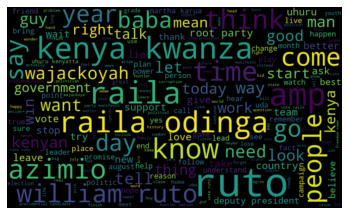

In [28]:
# Plotting Word Cloud 
allWords = ' '.join([twts for twts in df['tweet_clean']])
wordCloud = WordCloud(width = 1000, height = 600, random_state = 12, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


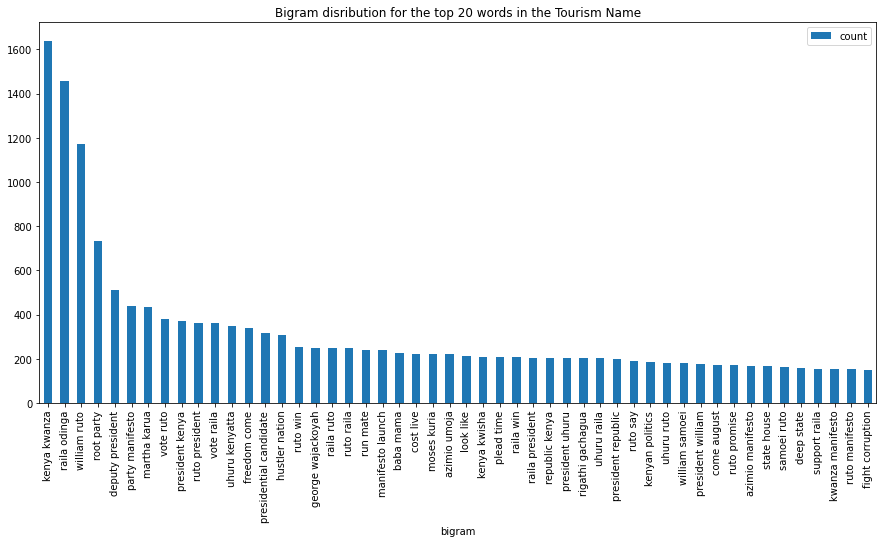

In [29]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df1['tweet_clean'])
total_words = tfidf_matrix.sum(axis=0) 

#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)

#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True)
 
#Taking first 20 records
words1 = bigram.head(50)

#Plotting the bigram distribution
words1.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the Tourism Name", figsize = (15,7), )

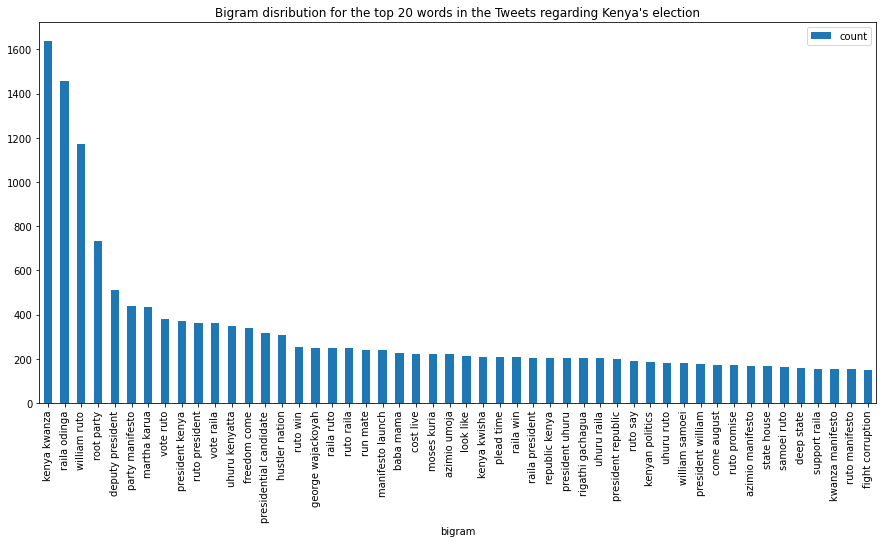

In [30]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df1['tweet_clean'])
total_words = tfidf_matrix.sum(axis=0) 

#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)

#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 

#Taking first 20 records
words2 = bigram.head(50)

#Plotting the bigram distribution
fig = words2.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the Tweets regarding Kenya's election", figsize = (15,7), )

### Word popularity - Presidential aspirants

In [31]:
# Applying aspirant finder function
words1['presidential_aspirant'] = words1['bigram'].apply(aspirant_finder)

In [32]:
# Replacing the various names used to refer to top preseidential contenders with their oficial names
words_clean =words1.replace({'presidential_aspirant' : { 'deputy' : 'Dr. William Samoei Ruto', 'baba' : 'Raila Amollo Odinga', 'ruto' : 'Dr. William Samoei Ruto', 'raila': 'Raila Amollo Odinga',  'wajackoyah': 'Prof. George Luchiri Wajackoyah'}})

# Dropping the now irrelevant bigram column
words_presidents = words_clean.drop('bigram', axis = 1)

# Group the records based on the presidential aspirants
words_president = words_presidents.groupby('presidential_aspirant',  as_index=False, sort=False).agg({'count': 'sum'})

# Drop records that have no mention of the presidential aspirant
words_president.drop(words_president.loc[words_president['presidential_aspirant']== 'None'].index, inplace=True)

# Get a count of the mentions of the presidential aspirants as a percentage
words_president['count'] = (words_president['count']/ words_president['count'].sum()) * 100
words_president

,presidential_aspirant,count
1,Raila Amollo Odinga,39.664946
2,Dr. William Samoei Ruto,56.793755
3,Prof. George Luchiri Wajackoyah,3.541299


### Word popularity - coalitions

In [33]:
# applying the coalition finder function
words1['coalition'] = words1['bigram'].apply(coalition_finder)

In [34]:
# Renaming the various party mentions and the various terms used to refer to coalitions and 
# partys by the general pulic with the official names of the colaitions they belong tu
words_clean =words1.replace({'coalition' : { 'kwanza': 'Kenya Kwanza', 'root': 'Roots Party', 'kwisha': 'Kenya Kwanza', 'azimio': 'azimio OKA alliance', 'assimio':'azimio OKA alliance', 'uda': 'Kenya Kwanza', 'hustler nation': 'Kenya Kwanza', 'odm': 'azimio OKA alliance'}})

# Dropping the now irrelevant bigram column
words_partys = words_clean.drop('bigram', axis = 1)

# groupning the records based on coalitions
words_party = words_partys.groupby('coalition',  as_index=False, sort=False).agg({'count': 'sum'})

# Dropping all records without a mention of a qualition in the tweet
words_party.drop(words_party.loc[words_party['coalition']== 'None'].index, inplace=True)

# Finding the mentions per coalition in percentage format
words_party['count'] = (words_party['count']/ words_party['count'].sum()) * 100

# output
words_party

,coalition,count
0,Kenya Kwanza,67.237060
2,Roots Party,21.375510
3,azimio OKA alliance,11.387431


In [35]:
# Creating dataframe subsets with tweets containing information on of the various presidential aspirants

# Dataset containing Ruto's mentions
df_ruto = df1 [df1 ['presidential_aspirant'] == 'Dr. William Samoei Ruto']

# Dataset containing raila's mentions
df_raila = df1 [df1 ['presidential_aspirant'] == 'Raila Amollo Odinga']

# Dataset containing Wajackoyahs mentions
df_wajackoyah = df1 [df1 ['presidential_aspirant'] == 'Prof. George Luchiri Wajackoyah']


### Polarity - assignements

Assigning sentiments as positive negative or neutral

**Note**

Polarity > 0 = Positive sentiment

Polarity < 0 = Negative sentiment

Polarity == 0 = Neutral sentiment

In [36]:
# Assigning values greater than zero with positive sentiment less than zero negative sentiment
df_ruto['Expressions'] = np.where(df_ruto['Polarity'] > 0, 'Positive', 'Negative')

# Assigning sentiniments with polarity of zero neutral sentiment
df_ruto.loc[df_ruto.Polarity == 0, 'Expressions'] = 'Neutral'

# Assigning values greater than zero with positive sentiment less than zero negative sentiment
df_raila['Expressions'] = np.where(df_raila['Polarity'] > 0, 'Positive', 'Negative')

# Assigning sentiniments with polarity of zero neutral sentiment
df_raila.loc[df_raila.Polarity == 0, 'Expressions'] = 'Neutral'

# Assigning values greater than zero with positive sentiment less than zero negative sentiment
df_wajackoyah['Expressions'] = np.where(df_wajackoyah['Polarity'] > 0, 'Positive', 'Negative')

# Assigning sentiniments with polarity of zero neutral sentiment
df_wajackoyah.loc[df_wajackoyah.Polarity == 0, 'Expressions'] = 'Neutral'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

### Polarity- histogram plots

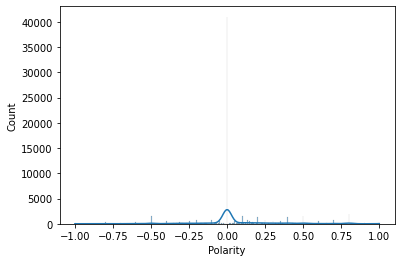

In [37]:
# Plotting a distribution of polarity of sentiments towards ruto
sns.histplot(data=df_ruto, x="Polarity", kde=True)

# Showing plot
plt.show()


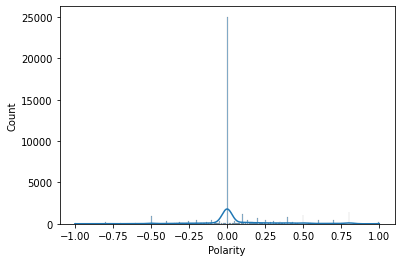

In [38]:
# Plotting a distribution of polarity of sentiments towards raila
sns.histplot(data=df_raila, x="Polarity", kde=True)

# Showing plot
plt.show()

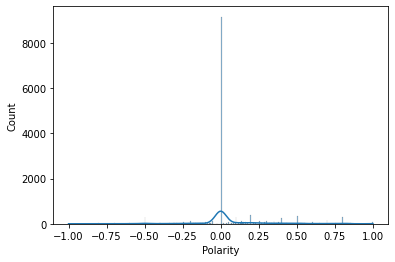

In [39]:
# Plotting a distribution of sentiments towards wajackhoyah
sns.histplot(data=df_wajackoyah, x="Polarity", kde=True)

# Showing plot
plt.show()

From the visuals of the three presidential aspirants it is evident that most of the sentiments with their mentions are neutral

### Polarity- counts

In [40]:
# Printing out the number of records that have neutral sentiments in the different presidential datasets
print(df_ruto[df_ruto['Polarity']==0].shape)
print(df_raila[df_raila['Polarity']==0].shape)
print(df_wajackoyah[df_wajackoyah['Polarity']==0].shape)

(40945, 12)
(25019, 12)
(9144, 12)


The dataframe with tweets that mentioned ruto has the most neutral sentiments, while wajackoyah has the least neutral sentiments

In [41]:
# printing out records with positive sentiments  in the different presidential datasets
print(df_ruto[df_ruto['Polarity']>0].shape)
print(df_raila[df_raila['Polarity']>0].shape)
print(df_wajackoyah[df_wajackoyah['Polarity']>0].shape)

(20164, 12)
(13540, 12)
(3855, 12)


From the result above, Ruto is the presidential aspirant with the most number of positive sentiments by social media users. Wajackoyah has the least number of positive sentiments

In [42]:
# Printing out number of records with negative sentiments  in the different presidential datasets
print(df_ruto[df_ruto['Polarity']<0].shape)
print(df_raila[df_raila['Polarity']<0].shape)
print(df_wajackoyah[df_wajackoyah['Polarity']<0].shape)

(11240, 12)
(6879, 12)
(1649, 12)


From the result above, Ruto recieves the highest number of negative sentiments among social media users, while wajackhoyah recieves the least number of negative sentiments by social media users

In [43]:
# creating a dataframe grouing neutral sentiments in the three different presidential datasets
neutral_ruto = df_ruto[df_ruto['Polarity']==0]
neutral_raila = df_raila[df_raila['Polarity']==0]
neutral_wajackoyah = df_wajackoyah[df_wajackoyah['Polarity']==0]

# Getting a average number of neutral sentiments for the three presidential aspirants
total_neutral = (len(neutral_ruto) + len(neutral_raila) + len(neutral_wajackoyah))/3

In [44]:
# droppping neutral sentiments for all datasets and printing remaining number of records per dataframe
df_ruto.drop((df_ruto[df_ruto['Polarity']==0]).index, inplace=True)
df_raila.drop((df_raila[df_raila['Polarity']==0]).index, inplace=True)
df_wajackoyah.drop((df_wajackoyah[df_wajackoyah['Polarity']==0]).index, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Polarity- distplots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


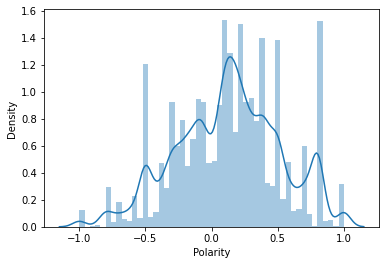

In [45]:
# distplot of polarity of sentiments towards ruto after removing neutral sentiments
sns.distplot(df_ruto['Polarity'])

# Show plot
plt.show()

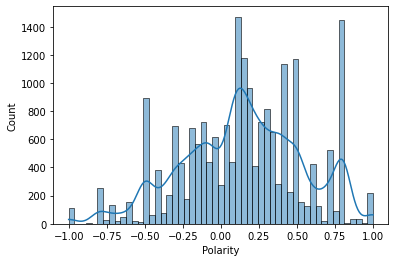

In [46]:
# distplot of polarity of sentiments towards raila after removing neutral sentiments
sns.histplot(data=df_raila, x="Polarity", kde=True)

# Show plot
plt.show()

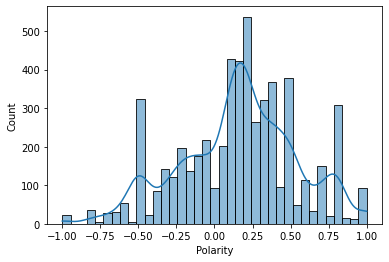

In [47]:
# distplot of polarity of sentiments towards wajackhoyah after removing neutral sentiments
sns.histplot(data=df_wajackoyah, x="Polarity", kde=True)

# Show plot
plt.show()

From the distplots, it is clear that most social media users have slighty negative or positive sentiments towards the three presidential aspirants

### Polarity boxplots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


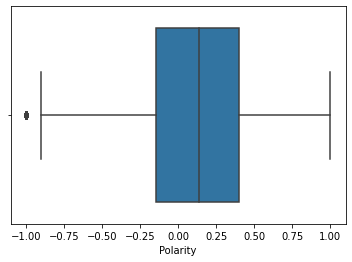

In [48]:
# Boxplot of sentiment polarity towards ruto
sns.boxplot(df_ruto['Polarity']);

# Show plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


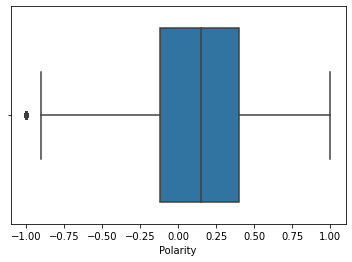

In [49]:
# Boxplot of sentiment polarity towards raila
sns.boxplot(df_raila['Polarity']);

# Show plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


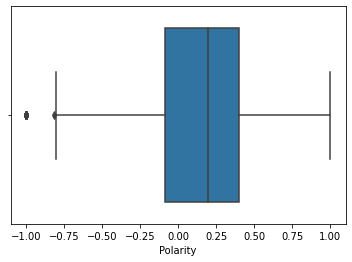

In [50]:
# Boxplot of sentiment polarity towards wajackhoyah
sns.boxplot(df_wajackoyah['Polarity']);

# Show plot
plt.show()

From the boxplots, there are no outliers in positive sentiments towards the various presidential aspirants. However tehre are some social media users that have extremely negative senyiments towards the different presidential aspirants

### Polarity - Group & countby expressions(negative/positive/neutral)

In [51]:
# grouping to get total positive and negative reviews
df_ruto.groupby('Expressions').count()

,Unnamed: 0,Unnamed: 0.1,tweet_id,time,tweet,retweet_count,tweet_clean,Subjectivity,Polarity,presidential_aspirant,coalition
Expressions,,,,,,,,,,,
Negative,11240,11240,11240,11240,11240,11240,11240,11240,11240,11240,11240
Positive,20164,20164,20164,20164,20164,20164,20164,20164,20164,20164,20164


In [52]:
# grouping to get total positive and negative reviews
df_raila.groupby('Expressions').count()

,Unnamed: 0,Unnamed: 0.1,tweet_id,time,tweet,retweet_count,tweet_clean,Subjectivity,Polarity,presidential_aspirant,coalition
Expressions,,,,,,,,,,,
Negative,6879,6879,6879,6879,6879,6879,6879,6879,6879,6879,6879
Positive,13540,13540,13540,13540,13540,13540,13540,13540,13540,13540,13540


In [53]:
# grouping to get total positive and negative reviews
df_wajackoyah.groupby('Expressions').count()

,Unnamed: 0,Unnamed: 0.1,tweet_id,time,tweet,retweet_count,tweet_clean,Subjectivity,Polarity,presidential_aspirant,coalition
Expressions,,,,,,,,,,,
Negative,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649
Positive,3855,3855,3855,3855,3855,3855,3855,3855,3855,3855,3855


### Bivariate analysis

In [54]:
# function get percentage of negative and positive sentiments
def pol_percent(subset,total):
    neg_percent = ((subset.groupby('Expressions').count())['Polarity'][0]/total)*100
    pos_percent = ((subset.groupby('Expressions').count())['Polarity'][1]/total)*100
    
    return neg_percent,pos_percent

In [55]:
# get thee length of the various dataframe subsets
records_raila = len(df_raila)
records_ruto = len(df_ruto)
records_wajackoyah = len(df_wajackoyah)

# Sumtotal of all positive, neutral and negative records for the three presidential aspirants
total_records = records_raila + records_ruto + records_wajackoyah + total_neutral

In [56]:
# getting percentage of negative and positive sentiments for the three different presidential aspirants

# Ruto
ruto_pol_percent = pol_percent(df_ruto,records_ruto)
print(ruto_pol_percent)

# Raila
raila_pol_percent = pol_percent(df_raila,records_raila)
print(raila_pol_percent)

# Raila
wajackoyah_pol_percent = pol_percent(df_wajackoyah,records_wajackoyah)
print(wajackoyah_pol_percent)

(35.79161890205069, 64.20838109794931)
(33.68921102894363, 66.31078897105637)
(29.96002906976744, 70.03997093023256)


In [57]:
# Plotting the distribution of positive and negative tweets per presidential candidate

# list of presidential aspirants
candidate = ['Dr. William Samoei Ruto','Raila Amollo Odinga', 'Prof. George Luchiri Wajackoyah']

# List of percentage positive and negative sentiments
pos = [ruto_pol_percent[1], raila_pol_percent[1], wajackoyah_pol_percent[1]]
neg = [ruto_pol_percent[0], raila_pol_percent[0], wajackoyah_pol_percent[0]] 

# plot
go.Figure(data=[
    go.Bar(name = 'Positive', x=candidate, y=pos),
    go.Bar(name = 'Negative', x=candidate, y=neg),   
])

## Presidential prediction

In [70]:
# get the favour per presidential aspirant and undecided social media users

# Ruto's favour
ruto_pos = (ruto_pol_percent[1] + (raila_pol_percent[0] + wajackoyah_pol_percent[0])/2) * (records_ruto/total_records )
print(ruto_pos)

# Raila's favour
raila_pos = (raila_pol_percent[1] + (ruto_pol_percent[0] + wajackoyah_pol_percent[0])/2) * (records_raila/total_records )
print(raila_pos)

# Wajackhoyah's favour
wajackoyah_pos = (wajackoyah_pol_percent[1] + (ruto_pol_percent[0] + raila_pol_percent[0])/2) * (records_wajackoyah/total_records)
print(wajackoyah_pos)

# Undecided social media users
undecided_pos = (total_neutral/total_records) * 100
print(undecided_pos)

36.61620348979471
24.589821278587195
7.002066995739549
30.397144348797394


In [59]:
# Creating a dataframe of the presidential outcomes and presidential prediction

# List of presidential aspirants and class of undecided electorate
y = ['ruto\'s Favour' ,'raila\'s Favour','wajackoyah\'s Favour', 'undecided voters']

# List of the three presidential aspirants plus class of undecided electorate
x = [ruto_pos,raila_pos, wajackoyah_pos, undecided_pos]

# dataframe of the elective class and labels of these claases
poll_prediction = pd.DataFrame(list(zip(y, x)),
               columns =['name', 'val'])

In [60]:
# Sorting the values of the presidential prediction in ascending order
fd = poll_prediction.sort_values(by='val', ascending = True)

# Running data in go bar
my_data = [go.Bar( x = fd.name, y = fd.val, orientation = 'h')]

# plot favour per presidentail aspirant
go.Figure(go.Bar(y=fd.name,
                 x= fd.val,
                 marker={'color':['rgb(100,200,150)','rgb(90,150,200)']},
                 orientation='h')).update_layout(title_text='Public Opinion')

In [71]:
# Getting total records of voters ignoring neutral tweets since in general election 
# there is no section of undecided in a ballot paper to predict the most likely 
# outcome of the 2022 elections
total_outcome = total_records - total_neutral

In [72]:
# get the favour per presidential aspirant and undecided social media users

# Ruto's favour
ruto_pos = (ruto_pol_percent[1] + (raila_pol_percent[0] + wajackoyah_pol_percent[0])/2) * (records_ruto/total_outcome )
print(ruto_pos)

# Raila's favour
raila_pos = (raila_pol_percent[1] + (ruto_pol_percent[0] + wajackoyah_pol_percent[0])/2) * (records_raila/total_outcome )
print(raila_pos)

# Wajackhoyah's favour
wajackoyah_pos = (wajackoyah_pol_percent[1] + (ruto_pol_percent[0] + raila_pol_percent[0])/2) * (records_wajackoyah/total_outcome)
print(wajackoyah_pos)


52.607329321784874
35.32875346639938
10.060028328189098


In [61]:
# function returning the tweets that were most positive together with ther polaritys
def pos_tweets(tweets,title):

    most_pos_text = tweets[tweets['Polarity'] == 1].tweet.head()

    most_pos_pol = tweets[tweets['Polarity'] == 1].Polarity.head()

    return most_pos_text, most_pos_pol 

"""    go.Figure(data=[go.Table(columnorder=[1,2],
                             columnwidth=[10,100],
                             header={'values':['Polarity',title],'align':'left'},
                             cells ={'values':[most_pos_pol,most_pos_text],'align':'left'}
                            )]).update_layout(title_text=title).show()"""

"    go.Figure(data=[go.Table(columnorder=[1,2],\n                             columnwidth=[10,100],\n                             header={'values':['Polarity',title],'align':'left'},\n                             cells ={'values':[most_pos_pol,most_pos_text],'align':'left'}\n                            )]).update_layout(title_text=title).show()"

In [62]:
# most positive tweets for

# Ruto
pos_tweets(df_ruto,'Positive tweets for William Ruto')

# Raila
pos_tweets(df_raila,'Positive tweets for Raila Odinga')

# Wajackhoyah
pos_tweets(df_wajackoyah,'Positive tweets for George wajackoyah')


(190640    @Kenyans @comradefyat Iv never seen a man with...
 190830    If Wajackoyah's Bhangi manifesto can revolutio...
 191871    @OleItumbi @WilliamsRuto The biggest lyer is a...
 192033    @craizyjux Kijana Wajackoyah anakudangaya. Be ...
 192092     @Kenyans Wajackoyah's roots is breathtaking 😊😊☝️
 Name: tweet, dtype: object, 190640    1.0
 190830    1.0
 191871    1.0
 192033    1.0
 192092    1.0
 Name: Polarity, dtype: float64)

In [63]:
# function returning the tweets that were most negative together with ther polaritys
def neg_tweets(tweets,title):

    most_neg_text = tweets[tweets['Polarity'] == -1].tweet.head()

    most_neg_pol = tweets[tweets['Polarity'] == -1].Polarity.head()

    return most_neg_text, most_neg_pol 

"""    go.Figure(data=[go.Table(columnorder=[1,2],
                             columnwidth=[10,100],
                             header={'values':['Polarity',title],'align':'left'},
                             cells ={'values':[most_pos_pol,most_pos_text],'align':'left'}
                            )]).update_layout(title_text=title).show()"""



"    go.Figure(data=[go.Table(columnorder=[1,2],\n                             columnwidth=[10,100],\n                             header={'values':['Polarity',title],'align':'left'},\n                             cells ={'values':[most_pos_pol,most_pos_text],'align':'left'}\n                            )]).update_layout(title_text=title).show()"

In [64]:
# most negative tweets for

# Ruto
neg_tweets(df_ruto,'negative tweets for William Ruto')

# Raila
neg_tweets(df_raila,'negative tweets for Raila Odinga')

# Wajackhoyah
neg_tweets(df_wajackoyah,'negative tweets for George wajackoyah')


(190724    At least the Union of veterinary practitioners...
 190781    People have been called worst, my locs for Waj...
 190977    @MigunaMiguna @betty_belkola Man you're are be...
 192920                  Wajackoyah is not completely insane
 193626    @IkeOjuok @Politricks_101 Wajackoyah is a terr...
 Name: tweet, dtype: object, 190724   -1.0
 190781   -1.0
 190977   -1.0
 192920   -1.0
 193626   -1.0
 Name: Polarity, dtype: float64)

In [65]:
# function genrating word cloud showing the most popular words for different presidential aspirants
def wordcloud(data,title):
    text = str(data.tweet_clean)
    wc = WordCloud(max_font_size=100,max_words=500,scale=10,relative_scaling=0.6,background_color='white').generate(text)

    plt.figure(figsize=(15,10))
    plt.title(title,{'fontsize':30,'family':'serif'})
    plt.axis('off')
    plt.imshow(wc)

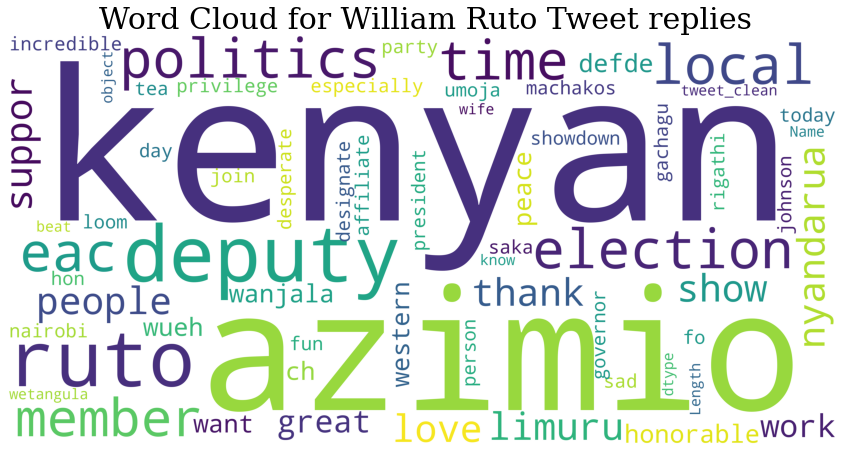

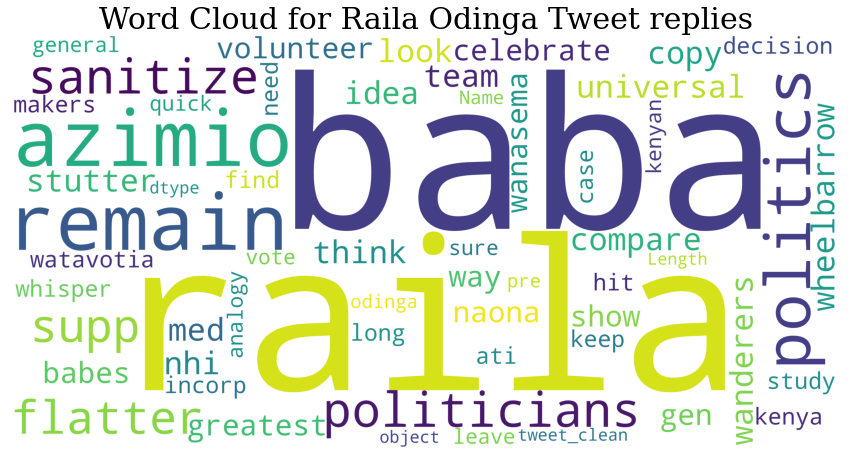

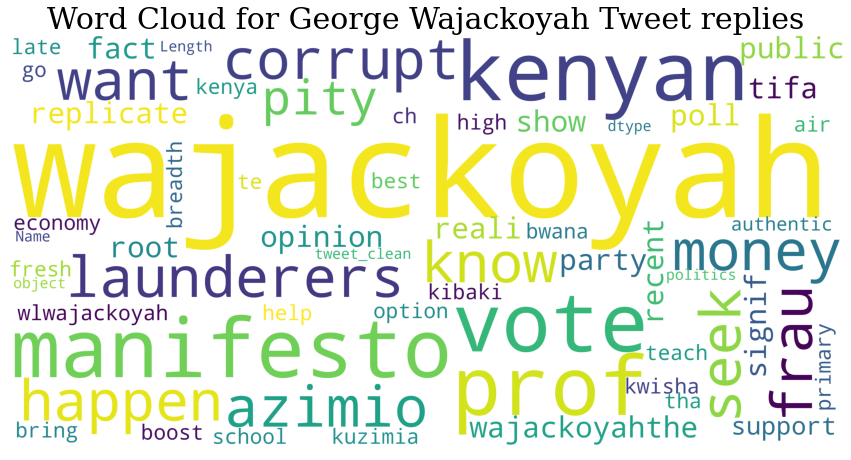

In [66]:
wordcloud(df_ruto, 'Word Cloud for William Ruto Tweet replies')

wordcloud(df_raila, 'Word Cloud for Raila Odinga Tweet replies')

wordcloud(df_wajackoyah, 'Word Cloud for George Wajackoyah Tweet replies')


## Results

**General sentiments**

The top ten most mentioned topics by social media users was as follows;

        bigram	    count	
0	kenya kwanza	    1640.103117	
1	raila odinga	    1458.472561	
2	william ruto	    1169.901490	
3	root party	      734.132224	
4	deputy president	510.946974	
5	party manifesto	  438.900758	
6	martha karua	    432.610101
7	vote ruto	        378.414608
8	president kenya	  369.138789	
9	ruto president	  361.117241



**Political coalitions**

The popularity of the various coalitions in this elections is as follows;
  coalition	count
1	Kenya Kwanza	67.237060
2	Roots Party	21.375510
3	azimio OKA alliance	11.387431 

Kenya kwanza leads the way with over three times the mentiosnof it's nearest competitor Roots party



**Presidential Aspirants**

From the analysis, The presidential aspirant william Ruto seemed to have the highest swings in terms of polarity. Ruto had the most positive and the most negative sentiments directed towards him by the various social media users of any of the three presidential aspirants

Raila Odinga was second of the three presidential aspirants in all categories while Wajackhoyah tailed in all these three respects

In terms of mentions, the popularity is as follows;

	  presidential_aspirant	        count
1	Dr. William Samoei Ruto	        56.793755
2	Raila Amollo Odinga	            39.664946
3	Prof. George Luchiri Wajackoyah	3.541299

Ruto was the most mentioned presidential aspirant



**Election prediction**

*With undecided voters*

By assuming that the positive sentiments a presidential aspirant gets equats to support and the negative sentiments gets equates to support of the opponnent, and this favour is affected by the occurence of that presidential aspirant in the dataset, the following results were obtained;

Dr. William Ruto = 36.61620348979471
Undecided Voters = 30.397144348797394
Raila Amollo Odinga = 24.589821278587195
Prof George Wajackoyah = 7.002066995739549

From our analysis Ruto leads the pack followed by the undecided voters while Wajackhoyah tails the pack

*Excluding undecided voters*

Excluding the undecided voters, the following results were obtained

Dr. William Ruto = 52.607329321784874
Raila Amollo Odinga = 35.32875346639938
Prof George Wajackoyah = 10.060028328189098



## Conclusion

From the list of the top 10 most trending topics, it was concluded that Kenyas politics is not issue rather personality based since 9/10 of the top mentions were politicians/political parties

From our analysis, we concluded that William Ruto is the most polarizing candidate. Ruto has the highest number of positive sentiments at the same time the highest number of negative sentiments

We also concluded that Ruto is the most mentioned political figure in the country while Wajackhoyah is the least mentioned

From our election prediction results, factoring in neutral voters as undecided voters, it was concluded that a large part of the electorate is still undecided on who to vote for in the forth coming election. 

Without the undecided voters, from the analysis, it was concluded that William Ruto will most likely win the election in the first round with slightly over 50% of the votes. 

**Disclaimer**

This prediction is made using only sentiments sourced from social media hence is not fully representative of Kenya's electorate

## Further questions

### A) Do we have the right question?

Yes we do

### B) Do we have the right data?

Yes the data is sufficient, upto date and appropiate to meet our objectives